In [402]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
sb.set()

In [403]:
ds  = pd.read_csv('employees_data.csv')

In [404]:
ds

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,$81000.00,$73862.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,$74628.00,$74628.00
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,$77280.00,$70174.00
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,$96276.00,$96276.00
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,WATER MGMNT,$84032.00,$76627.00
...,...,...,...,...,...
34213,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,$74628.00,$74628.00
34214,"ZYNIEWICZ, ROBERT J",CONSTRUCTION LABORER,WATER MGMNT,$73216.00,$66764.00
34215,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,$77238.00,$77238.00
34216,"ZYSKO, RICHARD",LIEUTENANT,FIRE,$101958.00,$101958.00


In [405]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34218 entries, 0 to 34217
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   NAME                                     34218 non-null  object
 1   JOB TITLE                                34218 non-null  object
 2   DEPARTMENT                               34218 non-null  object
 3   EMPLOYEE ANNUAL SALARY                   34218 non-null  object
 4   ESTIMATED ANNUAL SALARY MINUS FURLOUGHS  34218 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


In [406]:
ds['EMPLOYEE ANNUAL SALARY'] = ds['EMPLOYEE ANNUAL SALARY'].str.replace(',', '').str.replace('$', '').astype(float)
ds['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS'] = ds['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS'].str.replace(',', '').str.replace('$', '').astype(float)

In [407]:
ds

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,81000.0,73862.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,74628.0,74628.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,77280.0,70174.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,96276.0,96276.0
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,WATER MGMNT,84032.0,76627.0
...,...,...,...,...,...
34213,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,74628.0,74628.0
34214,"ZYNIEWICZ, ROBERT J",CONSTRUCTION LABORER,WATER MGMNT,73216.0,66764.0
34215,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,77238.0,77238.0
34216,"ZYSKO, RICHARD",LIEUTENANT,FIRE,101958.0,101958.0


In [408]:
ds[['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS','ESTIMATED ANNUAL SALARY MINUS FURLOUGHS']].corr()

,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS,1.0,1.0
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS,1.0,1.0


In [409]:
ds.rename(columns = {'Name':'name',
                    'JOB TITLE': 'job_title',
                    'DEPARTMENT': 'department',
                    'EMPLOYEE ANNUAL SALARY':'annual_salary', 
                    'ESTIMATED ANNUAL SALARY MINUS FURLOUGHS':'net_annual_salary'
                     }
                    , inplace = True)


In [410]:
ds

,NAME,job_title,department,annual_salary,net_annual_salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,81000.0,73862.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,74628.0,74628.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,77280.0,70174.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,96276.0,96276.0
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,WATER MGMNT,84032.0,76627.0
...,...,...,...,...,...
34213,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,74628.0,74628.0
34214,"ZYNIEWICZ, ROBERT J",CONSTRUCTION LABORER,WATER MGMNT,73216.0,66764.0
34215,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,77238.0,77238.0
34216,"ZYSKO, RICHARD",LIEUTENANT,FIRE,101958.0,101958.0


In [411]:
ds.columns = ds.columns.map(lambda x:x.lower())

In [412]:
ds.columns

Index(['name', 'job_title', 'department', 'annual_salary',
       'net_annual_salary'],
      dtype='object')

In [413]:
ds.name.unique().shape

(33908,)

In [414]:
ds.job_title.value_counts()

POLICE OFFICER                                 10918
FIREFIGHTER                                     1242
FIREFIGHTER-EMT                                 1198
SERGEANT                                        1177
MOTOR TRUCK DRIVER                               931
                                               ...  
WARRANTY CLERK                                     1
DIR OF YOUTH SERVICES                              1
DEPUTY FIRE COMMISSIONER / EXEC DIR OF OEMC        1
OFFICE ADMINISTRATOR                               1
VEHICLE REGISTRATION COORD                         1
Name: job_title, Length: 1124, dtype: int64

In [415]:
ds.department.value_counts()

POLICE                   14147
FIRE                      5085
STREETS & SAN             2193
WATER MGMNT               1834
OEMC                      1381
AVIATION                  1289
TRANSPORTN                1230
PUBLIC LIBRARY            1063
FAMILY & SUPPORT           863
HEALTH                     862
FLEET MANAGEMNT            612
GENERAL SERVICES           477
LAW                        413
REVENUE                    411
CITY COUNCIL               364
BUILDINGS                  291
COMMUNITY DEVELOPMENT      236
BUSINESS AFFAIRS           191
FINANCE                    190
CITY CLERK                 127
BOARD OF ELECTION          114
DoIT                        95
IPRA                        87
HUMAN RESOURCES             73
MAYOR'S OFFICE              73
ANIMAL CONTRL               66
CULTURAL AFFAIRS            65
ENVIRONMENT                 61
PROCUREMENT                 59
INSPECTOR GEN               54
BUDGET & MGMT               50
ADMIN HEARNG                40
DISABILI

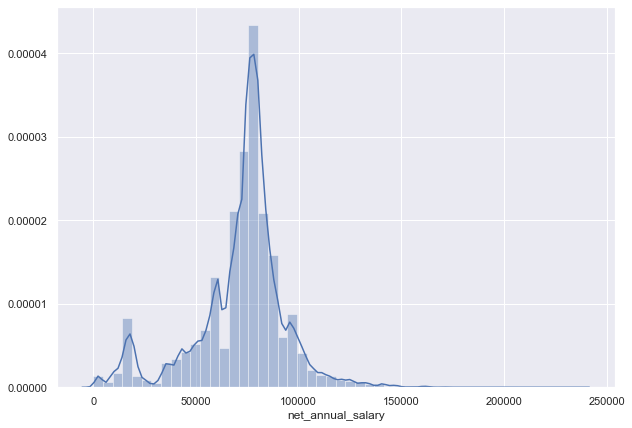

In [416]:
plt.figure(figsize = (10,7))
sb.distplot(ds.net_annual_salary)

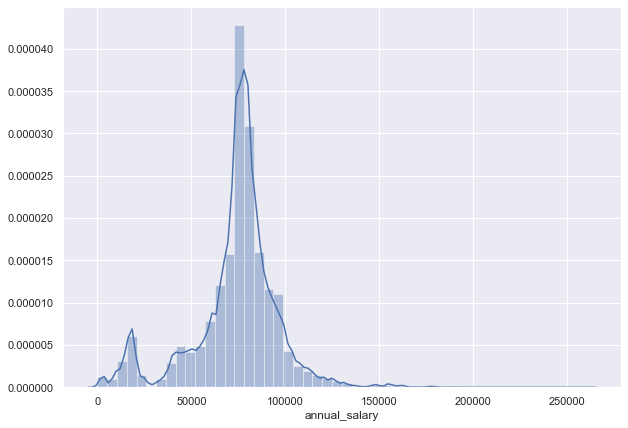

In [417]:
plt.figure(figsize = (10,7))
sb.distplot(ds.annual_salary)

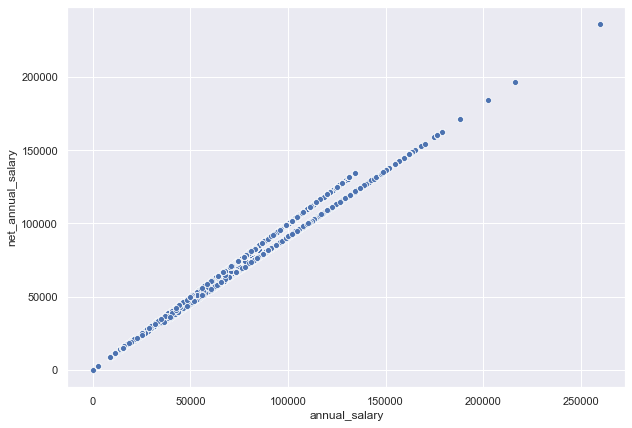

In [418]:
plt.figure(figsize = (10,7))
sb.scatterplot(ds.annual_salary, ds.net_annual_salary)

In [419]:
ds.groupby(['department','job_title'] )[['annual_salary']].agg(['count','median', 'std']).reset_index()[['department','job_title',
                                                                                                      'annual_salary']]

department                           job_title annual_salary  \
                                                               count   
0     ADMIN HEARNG              ADMINISTRATIVE ASST II            13   
1     ADMIN HEARNG             ADMINISTRATIVE ASST III             4   
2     ADMIN HEARNG  ADMINISTRATIVE SERVICES OFFICER II             1   
3     ADMIN HEARNG               ADMINISTRATIVE SUPVSR             1   
4     ADMIN HEARNG                            ASST DIR             1   
...            ...                                 ...           ...   
2132   WATER MGMNT             WATER QUALITY INSPECTOR             2   
2133   WATER MGMNT         WATER QUALITY INSPECTOR I/C             1   
2134   WATER MGMNT               WATER QUALITY MANAGER             1   
2135   WATER MGMNT                    WATER RATE TAKER            30   
2136   WATER MGMNT           WATER RESEARCH SPECIALIST             1   

                             
        median          std  
0      50952.0  3772.960478  
1      59928.0  4892.341771  
2      88812.0          NaN  
3      60408.0          NaN  
4      95808.0          NaN  
...        ...          ...  
2132   54606.0  1790.394370  
2133   63276.0          NaN  
2134  111216.0          NaN  
2135   72156.0  6858.173268  
2136   91260.0          NaN  

[2137 rows x 5 columns]

In [420]:
# creating new features using grouped statistics of department and job_title features
ds['dept_std_salary'] = ds.groupby(['department'] )['annual_salary'].transform(lambda x:
                                                                                  x.std())
ds['grouped_std_salary'] = ds.groupby(['department','job_title'] )['annual_salary'].transform(lambda x:
                                                                                  x.std())

In [421]:
ds

,name,job_title,department,annual_salary,net_annual_salary,dept_std_salary,grouped_std_salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,81000.0,73862.0,13765.781563,6858.173268
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,74628.0,74628.0,19952.060693,6379.696706
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,77280.0,70174.0,19255.477120,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,96276.0,96276.0,13765.781563,0.000000
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,WATER MGMNT,84032.0,76627.0,13765.781563,0.000000
...,...,...,...,...,...,...,...
34213,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,74628.0,74628.0,19952.060693,6379.696706
34214,"ZYNIEWICZ, ROBERT J",CONSTRUCTION LABORER,WATER MGMNT,73216.0,66764.0,13765.781563,50.660420
34215,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,77238.0,77238.0,19952.060693,6379.696706
34216,"ZYSKO, RICHARD",LIEUTENANT,FIRE,101958.0,101958.0,16802.121865,2030.081730


In [422]:
ds['dept_std_salary'].isnull().sum()

1

In [423]:
#removing null values
ds.dept_std_salary.fillna(ds.dept_std_salary.median(), inplace = True)
ds.grouped_std_salary.fillna(ds.grouped_std_salary.median(), inplace = True)


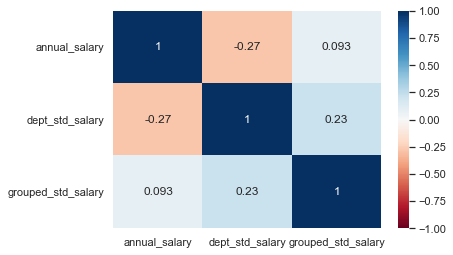

In [424]:
sb.heatmap(ds[['annual_salary','dept_std_salary','grouped_std_salary']].corr(), cmap = 'RdBu', vmin = -1,
               vmax = 1, center = 0, annot = True)

In [425]:
x_train, x_test, y_train, y_test = train_test_split(ds.drop('net_annual_salary', 1), ds.net_annual_salary,
                                                test_size = 0.3, random_state = 42) 

In [426]:
k = KFold(n_splits = 10, shuffle = True, random_state = 42)

In [427]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((23952, 6), (10266, 6), (23952,), (10266,))

In [428]:
# removing unnecessary features.
x_train = x_train.drop(['name','job_title','department'],axis = 1)
x_test = x_test.drop(['name','job_title','department'], axis = 1)

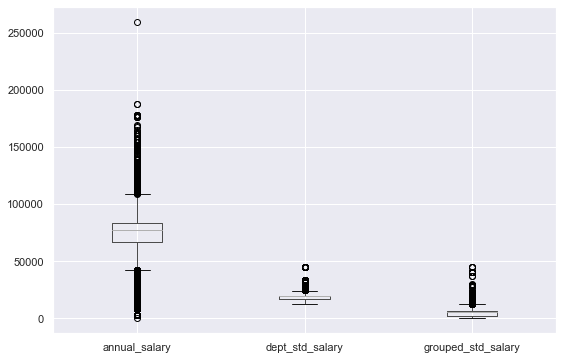

In [429]:
plt.figure(figsize = (9,6))
x_train_red.boxplot(list(x_train_red.columns))

In [430]:
ds_train = pd.concat([x_train_red, y_train], axis = 1)

In [431]:
z = abs(zscore(ds_train))

In [432]:
# here we are using z threshold as 3 to filter out outliers.
ds_train_new = ds_train[(z<3).all(axis = 1)]

In [433]:
print('no. of outliers removed:',ds_train.shape[0] - ds_train_new.shape[0])

no. of outliers removed: 1108


In [434]:
ds_train_new

,annual_salary,dept_std_salary,grouped_std_salary,net_annual_salary
28944,79926.0,19952.060693,6379.696706,79926.0
31799,84032.0,13765.781563,0.000000,76627.0
9857,50952.0,20673.835409,4300.269405,50952.0
826,98766.0,19952.060693,3170.155357,98766.0
34105,79926.0,16802.121865,3714.007803,79926.0
...,...,...,...,...
16850,93933.0,16247.511626,0.000000,85655.0
6265,40019.0,22911.851559,0.000000,36493.0
11284,82878.0,19952.060693,6379.696706,82878.0
860,88872.0,18396.600551,8795.025282,88872.0


In [435]:
# oultier-free data set
x_train_new = ds_train_new.iloc[:,0:-1]
y_train_new = ds_train_new.iloc[:,-1]

In [436]:
# label encoding 'dept_std_salary' and 'grouped_std_salary' columns.
encode = LabelEncoder()

In [437]:
x_train_new['dept_std_salary'] = encode.fit_transform(x_train_new['dept_std_salary'].values)
x_train_new['grouped_std_salary'] = encode.fit_transform(x_train_new['grouped_std_salary'].values)

In [438]:
x_test['dept_std_salary'] = encode.fit_transform(x_test['dept_std_salary'].values)
x_test['grouped_std_salary'] = encode.fit_transform(x_test['grouped_std_salary'].values)

In [439]:
x_train_new.shape, y_train_new.shape 

((22844, 3), (22844,))

###  Base Model Evaluation

model: RandomForestRegressor(random_state=42)
CV score:0.9987417775920058
score_std: 0.0003389922905463517
----------
model: LinearRegression()
CV score:0.9794744041478891
score_std: 0.0011387433421210455
----------
model: SVR()
CV score:0.10350497468958349
score_std: 0.009473392983078187
----------
model: AdaBoostRegressor()
CV score:0.9802561880307907
score_std: 0.0012851223905372433
----------
model: GradientBoostingRegressor(random_state=42)
CV score:0.9959311427625943
score_std: 0.0003734896622620533
----------
model: KNeighborsRegressor()
CV score:0.9978273549910301
score_std: 0.0003413524674708015
----------
model: XGBRegressor()
CV score:0.995837162294988
score_std: 0.00038733897195764743
----------


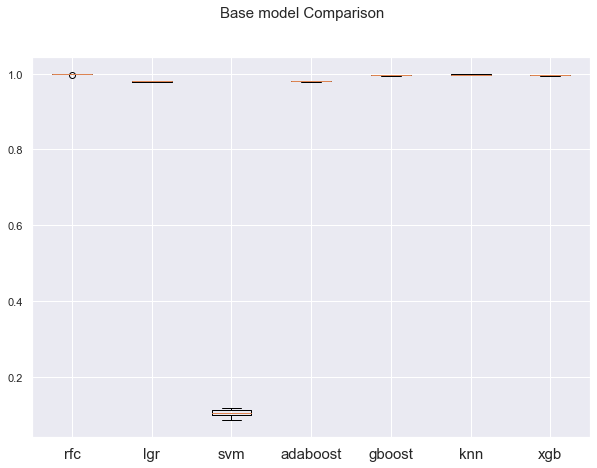

In [440]:
rfc = RandomForestRegressor(random_state = 42)
svm = SVR()
lr = LinearRegression()
adaboost =  AdaBoostRegressor()
gboost = GradientBoostingRegressor(random_state = 42)
knn = KNeighborsRegressor()
xgb = xgboost.XGBRegressor()

models = [rfc, lr, svm, adaboost, gboost, knn, xgb]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train_new, y_train_new, cv = k, scoring = 'r2', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 15)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rfc', 'lgr','svm', 'adaboost', 'gboost', 'knn', 'xgb', 'gnb'],
                  fontsize = 15)
fig.set_size_inches(10,7)
plt.show() 

Based on above result we  choose rfc, gboost, knn models for further tuning.

### Hyper-parameter tuning

In [441]:
param_knn = dict(n_neighbors = np.arange(1,101,1), algorithm = ['auto','ball_tree','kd_tree','brute'],
                leaf_size = [25,30,35], p = [1,2], weights = ['uniform','distance'])

param_rfc = dict(n_estimators = [10,15,20,25,30], criterion = ['mse', 'mae'],
                max_depth = [3,4,5,6,7,None],min_samples_split = [2,3,4],
                min_samples_leaf = [1,2,3], random_state = [41,42,43])

param_gboost =  dict(
   learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
   max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
   n_estimators = [100, 150, 200],
   min_samples_split = [1,2,3],
   min_samples_leaf = [1,2])

In [442]:
model_param_list = [(knn,param_knn), (gboost,param_gboost), (rfc,param_rfc)]

In [443]:
%%time
best_estimator_list = []
for model, param in model_param_list:
    
    r_rearch = RandomizedSearchCV(model, param, cv = k, n_jobs = -1, scoring = 'r2',
                                 random_state = 42)
    r_rearch.fit(x_train_new, y_train_new.values.ravel())
    best_cvscore = r_rearch.best_score_
    best_param = r_rearch.best_params_
    best_estimator = r_rearch.best_estimator_
    best_estimator_list.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')
    
print('best_estimators:',best_estimator_list)

model: KNeighborsRegressor()
best_cvscore: 0.9984675456381684
best_param: {'weights': 'distance', 'p': 1, 'n_neighbors': 22, 'leaf_size': 30, 'algorithm': 'ball_tree'}


model: GradientBoostingRegressor(random_state=42)
best_cvscore: 0.9993247443955431
best_param: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 6, 'learning_rate': 0.25}


model: RandomForestRegressor(random_state=42)
best_cvscore: 0.9946185488052418
best_param: {'random_state': 42, 'n_estimators': 15, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 7, 'criterion': 'mae'}


best_estimators: [KNeighborsRegressor(algorithm='ball_tree', n_neighbors=22, p=1,
                    weights='distance'), GradientBoostingRegressor(learning_rate=0.25, max_depth=6, n_estimators=200,
                          random_state=42), RandomForestRegressor(criterion='mae', max_depth=7, min_samples_leaf=3,
                      min_samples_split=3, n_estimators=15, random_state=42)]
Wall time: 5mi

### Testing

In [444]:
for model in best_estimator_list:
    model.fit(x_train_new, y_train_new)
    y_pred = model.predict(x_train_new)
    score = r2_score(y_train_new, y_pred)
    print('model',model)
    print('accuracy %:', score*100)
    print('\n')


model KNeighborsRegressor(algorithm='ball_tree', n_neighbors=22, p=1,
                    weights='distance')
accuracy %: 99.9992476131325


model GradientBoostingRegressor(learning_rate=0.25, max_depth=6, n_estimators=200,
                          random_state=42)
accuracy %: 99.9901301481006


model RandomForestRegressor(criterion='mae', max_depth=7, min_samples_leaf=3,
                      min_samples_split=3, n_estimators=15, random_state=42)
accuracy %: 99.4857268964557




In [445]:
for model in best_estimator_list:
    model.fit(x_train_new, y_train_new)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)
    print('model',model)
    print('accuracy %:', score*100)
    print('\n')

model KNeighborsRegressor(algorithm='ball_tree', n_neighbors=22, p=1,
                    weights='distance')
accuracy %: 98.92739450071491


model GradientBoostingRegressor(learning_rate=0.25, max_depth=6, n_estimators=200,
                          random_state=42)
accuracy %: 99.19831841729999


model RandomForestRegressor(criterion='mae', max_depth=7, min_samples_leaf=3,
                      min_samples_split=3, n_estimators=15, random_state=42)
accuracy %: 98.82043506355363


